In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime

In [2]:
df = pd.read_csv("/Users/arnet/Desktop/Ironhack/GitHub/ironhack_lab_assignments/Day3/lab-customer-analysis-round-2-master/files_for_lab/csv_files/marketing_customer_analysis.csv")

# Shape

In [3]:
df.shape

(10910, 26)

# Standardize header names

In [4]:
df.tail()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,...,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


In [5]:
# Drop index column and vehicle type column
df = df.drop(['Unnamed: 0', 'Vehicle Type'], axis=1)
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [6]:
df.columns.to_list()

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [7]:
# Rename columns to ensure consistency
df = df.rename(columns={'EmploymentStatus': 'Employment Status'})
df.columns.to_list()

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'Employment Status',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [8]:
def standardise_col(col):
    return col.lower().replace(" ", "_")

standard_heads =[]
for column in df.columns:
    standard_heads.append(standardise_col(column))

df.columns = standard_heads
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


# Categorical and Numerical

In [9]:
df_numerical = df.select_dtypes(np.number)
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [10]:
#Reset index
df.reset_index(drop=True, inplace=True)

In [11]:
df_categorical = df.drop(columns = df_numerical.columns)
df_categorical
df_categorical = df.select_dtypes(include='object')
df_categorical.columns.to_list()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

# Null values

In [13]:
nulls_df= pd.DataFrame(round(df.isna().sum()/len(df), 4)*100)
nulls_df

,0
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employment_status,0.00
gender,0.00
income,0.00


In [14]:
# Replace all Null Values in categorical columns with 'Unknown'
for column in df_categorical.columns:
    df[column]= df[column].fillna('Unknown')
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [15]:
# Replace all Null Values in numerical columns with mean
for column in df_numerical.columns:
    df[column]= df[column].fillna(df[column].mean())
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

# Datetime Format

In [17]:
# Change date to date/time format
df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employment_status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

In [18]:
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [19]:
# Extract month and save in a different column
df['month']= pd.DatetimeIndex(df['effective_to_date']).month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employment_status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

In [20]:
df.shape

(10910, 25)

In [21]:
print(nulls_df)

                                  0
customer                       0.00
state                          5.78
customer_lifetime_value        0.00
response                       5.78
coverage                       0.00
education                      0.00
effective_to_date              0.00
employment_status              0.00
gender                         0.00
income                         0.00
location_code                  0.00
marital_status                 0.00
monthly_premium_auto           0.00
months_since_last_claim        5.80
months_since_policy_inception  0.00
number_of_open_complaints      5.80
number_of_policies             0.00
policy_type                    0.00
policy                         0.00
renew_offer_type               0.00
sales_channel                  0.00
total_claim_amount             0.00
vehicle_class                  5.70
vehicle_size                   5.70


# Set Filter

In [22]:
df = df.query('month<3')
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


# Bonus

In [96]:
def standardise_col(col):
    return col.lower().replace(" ", "_")

def clean_data(df):
    #Drop columns
    df = df.drop(['Unnamed: 0', 'Vehicle Type'], axis=1)
    
    #Rename columns
    df = df.rename(columns={'EmploymentStatus': 'Employment Status'})
    
    # Standardise column names
    standard_heads =[]
    for column in df.columns:
        standard_heads.append(column.lower().replace(" ", "_"))
    df.columns = standard_heads
    
    #Create nulls dataframe
    nulls_df= pd.DataFrame(round(df.isna().sum()/len(df), 4)*100)
    #print("Overview of Null Values before clean: ")
    #print(nulls_df)
    
    # Identify categorical and numerical columns
    df_numerical = df.select_dtypes(np.number)
    df_categorical = df.select_dtypes(include='object')
    
    # Replace all Null Values in categorical columns with 'Unknown'
    for column in df_categorical.columns:
        df[column]= df[column].fillna('Unknown')
    
    # Replace all Null Values in numerical columns with mean
    #for column in df_numerical.columns:
     #   df[column]= df[column].fillna(df[column].mean())
    
    #Change date to date/time format
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    
    # Extract month and save in a different column
    df['month']= pd.DatetimeIndex(df['effective_to_date']).month
    
    # Create filtered data out data that is not in the first quarter
    df = df.query('month<3')
    df = df.query('income>0')
    
    #print('')
    #print("Overview of Null Values after clean: ")
    nulls_df= pd.DataFrame(round(df.isna().sum()/len(df), 4)*100)
    #print(nulls_df)
    #print(df)
    return df

df = pd.read_csv("/Users/arnet/Desktop/Ironhack/GitHub/ironhack_lab_assignments/Day3/lab-customer-analysis-round-2-master/files_for_lab/csv_files/marketing_customer_analysis.csv")
df = clean_data(df)

# Exploratory Data Analysis

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8123 entries, 0 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       8123 non-null   object        
 1   state                          8123 non-null   object        
 2   customer_lifetime_value        8123 non-null   float64       
 3   response                       8123 non-null   object        
 4   coverage                       8123 non-null   object        
 5   education                      8123 non-null   object        
 6   effective_to_date              8123 non-null   datetime64[ns]
 7   employment_status              8123 non-null   object        
 8   gender                         8123 non-null   object        
 9   income                         8123 non-null   int64         
 10  location_code                  8123 non-null   object        
 11  marital_status  

In [98]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,8123.000000,8123.000000,8123.000000,7666.000000,8123.000000,7666.000000,8123.000000,8123.000000,8123.000000
mean,8156.394064,50414.978087,92.996430,15.098226,47.856334,0.382729,2.962452,377.910109,1.470023
std,6999.969560,24260.858125,34.644927,10.075741,27.902302,0.907393,2.403456,251.933134,0.499131
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4110.908596,28422.000000,68.000000,6.000000,24.000000,0.000000,1.000000,213.032940,1.000000
50%,5807.659307,48156.000000,83.000000,14.000000,48.000000,0.000000,2.000000,340.800000,1.000000
75%,9075.768214,70060.000000,109.000000,23.000000,71.000000,0.000000,4.000000,499.200000,2.000000
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

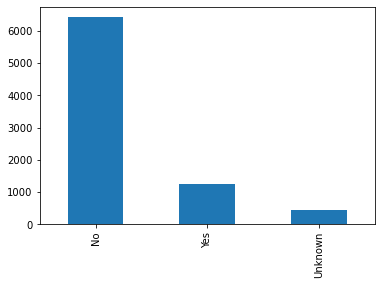

In [100]:
# Yes and No responses
df['response'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

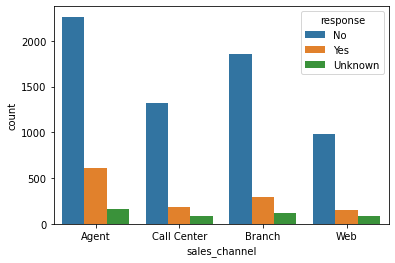

In [101]:
# Rate of yes and no responses according to sales channel
sns.countplot(data=df, x='sales_channel', hue='response')

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

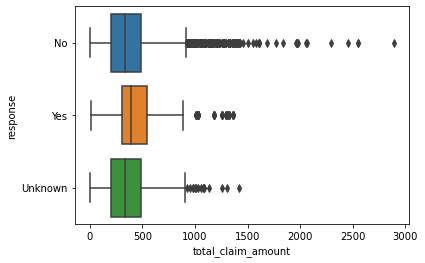

In [102]:
#Show a plot of the distribution of the Total Claim Amount, broken down by response type
sns.boxplot(x='total_claim_amount', y="response", data=df)

<AxesSubplot:>

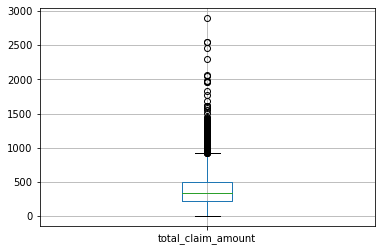

In [103]:
df.boxplot('total_claim_amount')

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

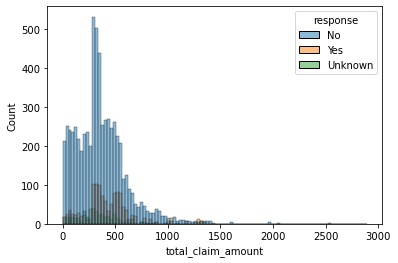

In [104]:
sns.histplot(x='total_claim_amount', hue="response", data=df)

<AxesSubplot:xlabel='income', ylabel='Count'>

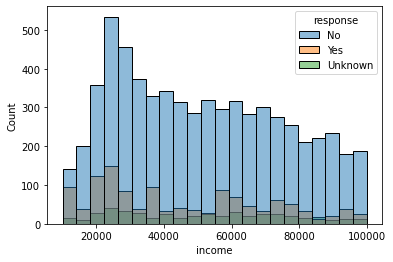

In [105]:
sns.histplot(x='income', hue="response", data=df)

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

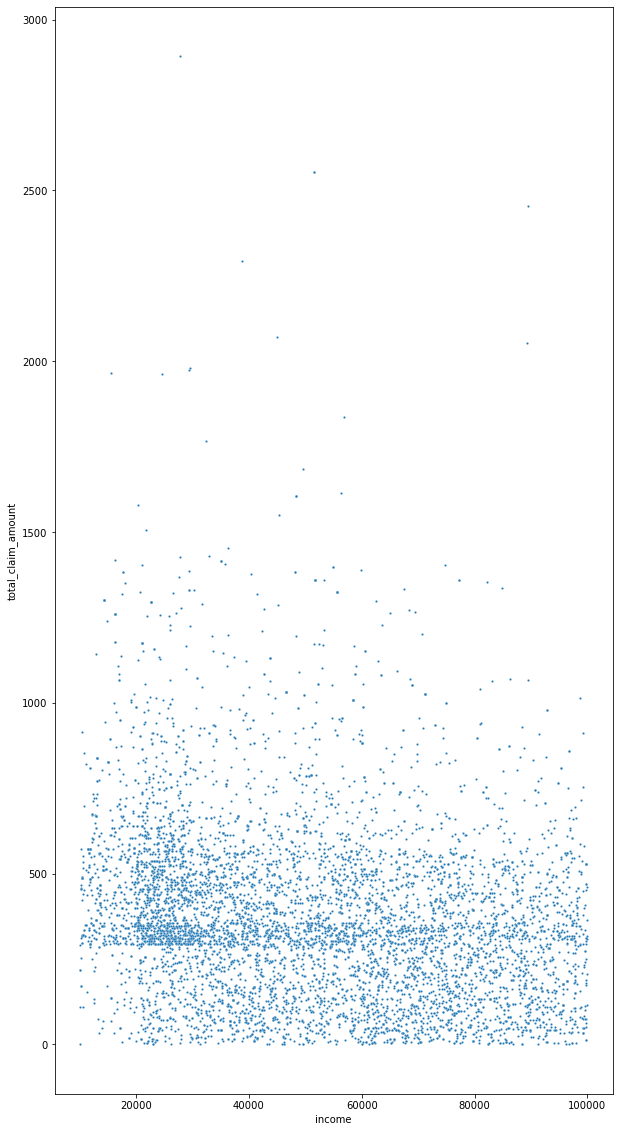

In [107]:
# Create scatterplot of income and total claim amount, adjust figure- and marker size to avoid overplotting
plt.figure(figsize=(10,20))
sns.scatterplot(x='income', y='total_claim_amount', data=df, s=5, alpha=1) # 's' adjusts marker size